In [1]:
from mesmerize_core import *
import tifffile
import numpy as np
from matplotlib import pyplot as plt

/home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)
2022-06-03 13:46:36.750569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-03 13:46:36.750592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# set the parent directory as the top-level directory for your experiment data
set_parent_data_path("/home/kushal/ccn-2020-workshop/")

batch_path = "/home/kushal/ccn-2020-workshop/mesmerize-demos/mesmerize-core-batch/batch-demo3.pickle"

# create a new batch
df = create_batch(batch_path)
df

,algo,name,input_movie_path,params,outputs,uuid


In [3]:
# path to raw movie tiff file
movie_path = "/home/kushal/ccn-2020-workshop/mesmerize-demos/movies/sue_movie.tif"

# params, exactly the same as what you'd directly use with CaImAn
mcorr_params1 =\
{
  'mcorr_kwargs': # this key is necessary for specifying that these are mcorr kwargs
    {
        'max_shifts': [24, 24],
        'strides': [48, 48],
        'overlaps': [24, 24],
        'max_deviation_rigid': 3,
        'border_nan': 'copy',
        'pw_rigid': True,
        'gSig_filt': None
    },
}

In [4]:
# add an item to the batch
df.caiman.add_item(
  algo='mcorr',
  name='my_movie',
  input_movie_path=movie_path,
  params=mcorr_params1
)
df

,algo,name,input_movie_path,params,outputs,uuid
0,mcorr,my_movie,mesmerize-demos/movies/sue_movie.tif,"{'mcorr_kwargs': {'max_shifts': [24, 24], 'str...",None,bca4970b-7b9e-426b-9ce6-b6864697b02e


In [5]:
# We create another set of params, useful for gridsearches for example
mcorr_params2 =\
{
  'mcorr_kwargs': # this key is necessary for specifying that these are mcorr kwargs
    {
        'max_shifts': [24, 24],
        'strides': [24, 24],
        'overlaps': [12, 12],
        'max_deviation_rigid': 3,
        'border_nan': 'copy',
        'pw_rigid': True,
        'gSig_filt': None
    },
}

# add other param variant to the batch
df.caiman.add_item(
  algo='mcorr',
  name='my_movie',
  input_movie_path=movie_path,
  params=mcorr_params2
)
df

,algo,name,input_movie_path,params,outputs,uuid
0,mcorr,my_movie,mesmerize-demos/movies/sue_movie.tif,"{'mcorr_kwargs': {'max_shifts': [24, 24], 'str...",None,bca4970b-7b9e-426b-9ce6-b6864697b02e
1,mcorr,my_movie,mesmerize-demos/movies/sue_movie.tif,"{'mcorr_kwargs': {'max_shifts': [24, 24], 'str...",None,ec32e915-6f24-4afa-be44-90532267d6d4


In [6]:
# run the first "batch item"
process = df.iloc[0].caiman.run(
  batch_path=batch_path,
  backend=COMPUTE_BACKEND_SUBPROCESS,  # this is for non-GUI use, COMPUTE_BACKEND_QPROCESS is for use within a Qt GUI
  callbacks_finished=[lambda: print("yay finished")], # callback function for when this item finishes
)
process.wait()

/home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)
2022-06-03 13:49:32.947905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/cv2/../../lib64:/home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-03 13:49:32.947928: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


starting mc


100%|██████████| 1/1 [00:00<00:00,  6.86it/s]




mc finished successfully!
computing projections
Computing correlation image
finished computing correlation image
{'mean-projection-path': PosixPath('mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6-b6864697b02e_mean_projection.npy'), 'std-projection-path': PosixPath('mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6-b6864697b02e_std_projection.npy'), 'max-projection-path': PosixPath('mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6-b6864697b02e_max_projection.npy'), 'mcorr-output-path': PosixPath('mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6-b6864697b02e-sue_movie_els__d1_170_d2_170_d3_1_order_F_frames_3000_.mmap'), 'corr-img-path': PosixPath('mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6-b6864697b02e_cn.npy'), 'shifts': PosixPath('mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6-b6864697b02e_shifts.npy'), 'success': True, 'traceback': None}


0

In [7]:
df = load_batch(batch_path)
df

,algo,name,input_movie_path,params,outputs,uuid
0,mcorr,my_movie,mesmerize-demos/movies/sue_movie.tif,"{'mcorr_kwargs': {'max_shifts': [24, 24], 'str...",{'mean-projection-path': mesmerize-demos/movie...,bca4970b-7b9e-426b-9ce6-b6864697b02e
1,mcorr,my_movie,mesmerize-demos/movies/sue_movie.tif,"{'mcorr_kwargs': {'max_shifts': [24, 24], 'str...",None,ec32e915-6f24-4afa-be44-90532267d6d4


In [8]:
input_movie = tifffile.imread(df.iloc[0].caiman.get_input_movie_path()).astype(np.float32)

# extension for loading the mcorr movie
# np.float32 because Nvidia doesn't support 64bit floats on desktop GPUs
mcorr_movie = df.iloc[0].mcorr.get_output().astype(np.float32)

In [9]:
from fastplotlib import GridPlot, Image, Plot
from ipywidgets.widgets import IntSlider

RFBOutputContext()


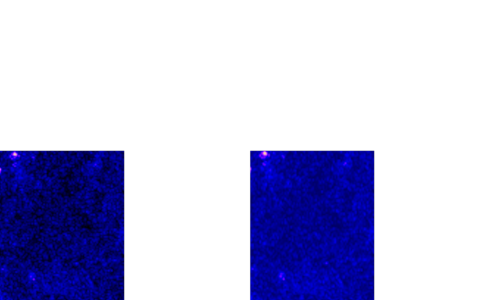

JupyterWgpuCanvas()

In [10]:
# gridplot with 1 row, 2 columns
gp = GridPlot(
    shape=(1, 2),
    controllers=np.array([[0, 0]]) # this is to that we can pan-zoom in sync :D 
)

input_graphic = Image(
    data=input_movie[0], # image data for the first frame
    cmap='gnuplot2' # my favorite colormap
)

mcorr_graphic = Image(
    data=mcorr_movie[0], # image data for the first frame
    cmap='gnuplot2'
)

# add the grahpics to the subplots
gp.subplots[0, 0].add_graphic(input_graphic)
gp.subplots[0, 1].add_graphic(mcorr_graphic)

# make a GUI slider
slider = IntSlider(value=0, min=0, max=input_movie.shape[0] - 1, step=1)

previous_value = 0

# a function to update the frame based on the slider value
def update_frame():
    global previous_value
    if previous_value == slider.value:
        return
    
    input_graphic.update_data(input_movie[slider.value])
    mcorr_graphic.update_data(mcorr_movie[slider.value])
    
# add to the animation so that this is run in every render cycle
gp.add_animations([update_frame])
gp.show()

In [11]:
slider

IntSlider(value=0, max=2999)

In [12]:
gp.canvas.close()

In [13]:
# We can continue from mcorr above and perform CNMF using the mcorr output

# some params for CNMF
params_cnmf =\
{
    'cnmf_kwargs':
        {
            'p': 1,
            'gnb': 2,
            # raises error: no parameter 'merge_thresh' found
            'merge_thr': 0.85,
            'rf': 15,
            'stride_cnmf': 6,
            'K': 4,
            'gSig': [4, 4],
            'ssub': 1,
            'tsub': 1,
            'method_init': 'greedy_roi',
        },
    'eval_kwargs':
        {
            'min_SNR': 2.0,
            'rval_thr': 0.7,
            'use_cnn': True,
            'min_cnn_thr': 0.8,
            'cnn_lowest': 0.1,
            'decay_time': 0.4,
        },
    'refit': True,
}

df.caiman.add_item(
  algo='cnmf',
  name='my_movie',
  input_movie_path=df.iloc[0].mcorr.get_output_path(),  # use mcorr output from a previous item
  params=params_cnmf
)

# run this item
process = df.iloc[-1].caiman.run(
  batch_path=batch_path,
  backend=COMPUTE_BACKEND_SUBPROCESS,
  callbacks_finished=[lambda: print("yay finished")],
)

process.wait()

/home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)
2022-06-03 13:55:50.793262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/cv2/../../lib64:/home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-03 13:55:50.793282: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


cnmf params {'cnmf_kwargs': {'p': 1, 'gnb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride_cnmf': 6, 'K': 4, 'gSig': [4, 4], 'ssub': 1, 'tsub': 1, 'method_init': 'greedy_roi'}, 'eval_kwargs': {'min_SNR': 2.0, 'rval_thr': 0.7, 'use_cnn': True, 'min_cnn_thr': 0.8, 'cnn_lowest': 0.1, 'decay_time': 0.4}, 'refit': True}


making memmap


2022-06-03 13:56:28.112505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/cv2/../../lib64:/home/kushal/python-venvs/mesmerize-napari/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-03 13:56:28.112532: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-03 13:56:28.112551: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kushal-debian-thinkpad): /proc/driver/nvidia/version does not exist
2022-06-03 13:56:28.112792: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA

performing CNMF
fitting images
refitting
Eval
USING MODEL:/home/kushal/caiman_data/model/cnn_model.json
5/5 [==============================] - 0s 18ms/step
Final output dict:
{'mean-projection-path': PosixPath('mesmerize-demos/movies/0a97764b-48cf-45eb-a806-eb835b83e09d_mean_projection.npy'), 'std-projection-path': PosixPath('mesmerize-demos/movies/0a97764b-48cf-45eb-a806-eb835b83e09d_std_projection.npy'), 'max-projection-path': PosixPath('mesmerize-demos/movies/0a97764b-48cf-45eb-a806-eb835b83e09d_max_projection.npy'), 'cnmf-hdf5-path': PosixPath('mesmerize-demos/movies/0a97764b-48cf-45eb-a806-eb835b83e09d.hdf5'), 'cnmf-memmap-path': PosixPath('mesmerize-demos/movies/0a97764b-48cf-45eb-a806-eb835b83e09d_cnmf-memmap__d1_170_d2_170_d3_1_order_C_frames_3000_.mmap'), 'corr-img-path': PosixPath('mesmerize-demos/movies/0a97764b-48cf-45eb-a806-eb835b83e09d_cn.npy'), 'success': True, 'traceback': None}


0

In [14]:
df = load_batch(batch_path)
df

,algo,name,input_movie_path,params,outputs,uuid
0,mcorr,my_movie,mesmerize-demos/movies/sue_movie.tif,"{'mcorr_kwargs': {'max_shifts': [24, 24], 'str...",{'mean-projection-path': mesmerize-demos/movie...,bca4970b-7b9e-426b-9ce6-b6864697b02e
1,mcorr,my_movie,mesmerize-demos/movies/sue_movie.tif,"{'mcorr_kwargs': {'max_shifts': [24, 24], 'str...",None,ec32e915-6f24-4afa-be44-90532267d6d4
2,cnmf,my_movie,mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6...,"{'cnmf_kwargs': {'p': 1, 'gnb': 2, 'merge_thr'...",{'mean-projection-path': mesmerize-demos/movie...,0a97764b-48cf-45eb-a806-eb835b83e09d


In [15]:
df.iloc[-1]

algo                                                             cnmf
name                                                         my_movie
input_movie_path    mesmerize-demos/movies/bca4970b-7b9e-426b-9ce6...
params              {'cnmf_kwargs': {'p': 1, 'gnb': 2, 'merge_thr'...
outputs             {'mean-projection-path': mesmerize-demos/movie...
uuid                             0a97764b-48cf-45eb-a806-eb835b83e09d
Name: 2, dtype: object

In [17]:
# get the motion corrected movie as a memmap
cnmf_movie = df.iloc[-1].cnmf.get_input_memmap()

# we can get the contours of the spatial components
coors, coms = df.iloc[-1].cnmf.get_spatial_contours()

RFBOutputContext()


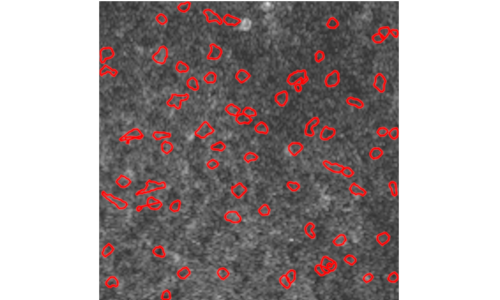

JupyterWgpuCanvas()

In [18]:
# create a simple plot
plot = Plot()

# plot the first frame
image_graphic = plot.image(data=cnmf_movie[0], cmap='gray')

# plot all the contours
for coor in coors:
    # line data has to be 3D
    zs = np.ones(coor.shape[0]) # this will place it above the image
    coors_3d = np.dstack([coor[:, 0], coor[:, 1], zs])[0].astype(np.float32)
    
    # red color, just [R, G, B, A] -> red, green, blue, alpha (transparency)
    colors = np.vstack([[1., 0., 0., 1.]] * coors_3d.shape[0]).astype(np.float32)
    plot.line(data=coors_3d, colors=colors)

# make a slider like for mcorr
slider_cnmf = IntSlider(value=0, min=0, max=cnmf_movie.shape[0] - 1, step=1)
    
previous_ix = 0

# animate func just like mcorr viz
def update_frame_cnmf():
    if slider_cnmf.value == previous_ix:
        return
    image_graphic.update_data(data=cnmf_movie[slider_cnmf.value])

plot.add_animations([update_frame_cnmf])
    
plot.show()

In [19]:
slider_cnmf

IntSlider(value=0, max=2999)

In [20]:
plot.canvas.close()

# View the reconstructed movie

RFBOutputContext()


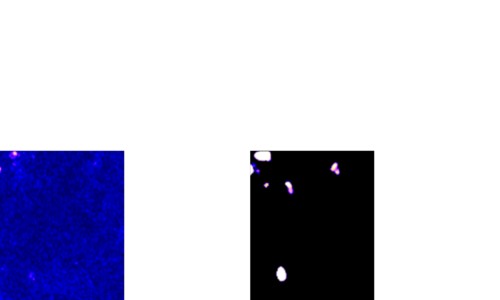

JupyterWgpuCanvas()

In [21]:
# gridplot with 1 row, 2 columns
gp_rcm = GridPlot(
    shape=(1, 2),
    controllers=np.array([[0, 0]]) # this is to that we can pan-zoom in sync :D 
)

# for the mcorr movie
left_graphic = Image(
    data=cnmf_movie[0], # image data for the first frame
    cmap='gnuplot2' # my favorite colormap
)

# get the first frame of reconstructed movie
rcm0 = df.iloc[-1].cnmf.get_reconstructed_movie(ixs_frames=(0, 1), add_background=False)[0]

# create the graphic
right_graphic = Image(
    data=rcm0, # image data for the first frame
    vmin=10,
    vmax=20,
    cmap='gnuplot2'
)

# add the grahpics to the subplots
gp_rcm.subplots[0, 0].add_graphic(left_graphic)
gp_rcm.subplots[0, 1].add_graphic(right_graphic)

# make a GUI slider
slider_rcm = IntSlider(value=0, min=0, max=cnmf_movie.shape[0] - 1, step=1)

previous_value = 0

# a function to update the frame based on the slider value
def update_rcm_frame():
    global previous_value
    if previous_value == slider_rcm.value:
        return
    
    left_graphic.update_data(cnmf_movie[slider_rcm.value])
    
    ixs_frames = (slider_rcm.value, slider_rcm.value + 1)
    
    # get the A x C for just 1 frame
    rcm_frame = df.iloc[-1].cnmf.get_reconstructed_movie(ixs_frames=ixs_frames, add_background=False)[0]
    right_graphic.update_data(rcm_frame)
    
# add to the animation so that this is run in every render cycle
gp_rcm.add_animations([update_rcm_frame])
gp_rcm.show()

In [22]:
slider_rcm

IntSlider(value=0, max=2999)

**The reconstructed movie is from all components, not just the ones that passed eval. That's why you're seeing a lot of neuropil etc. here. As I mentioned, the API is still evolving so using `idx_components_good` hasn't been implemented with the reconstructed movie extension**